## 1. DecisionTree를 사용한 경우

In [1]:
# zip: 동일한 개수로 이루어진 자료형을 묶어 주는 역할을 하는 함수
print(list(zip([1, 2, 3], [4, 5, 6])))
print(list(zip([1, 2, 3], [4, 5, 6], [7, 8, 9])))
print(list(zip("abc", "def")))


[(1, 4), (2, 5), (3, 6)]
[(1, 4, 7), (2, 5, 8), (3, 6, 9)]
[('a', 'd'), ('b', 'e'), ('c', 'f')]


In [2]:
import matplotlib.pyplot as plt
from sklearn import datasets # 학습 데이터 제공

# digits 데이터를 로드
digits = datasets.load_digits()
print(type(digits)) # <class 'sklearn.utils.Bunch'>

<class 'sklearn.utils.Bunch'>


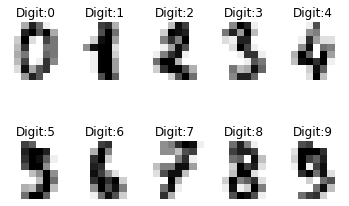

In [5]:
# 이미지를 2행 5열로 표시
# label: 숫자, img: 숫자를 나타내는 벡터값
for label, img in zip(digits.target[:10], digits.images[:10]):
    plt.subplot(2, 5, label+1) # plot의 시작 위치는 1부터 시작
    plt.axis('off') # 축 출력 안함
    # interpolation='nearest': 이미지 픽셀이 없는 영역은 주변 픽셀값을 사용
    plt.imshow(img, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Digit:%d' % label) # 제목 출력

plt.show()

In [7]:
import numpy as np
from sklearn import datasets

# 손으로 쓴 숫자 데이터 읽기
digits=datasets.load_digits()
print(type(digits))

# 3과 8의 데이터 위치를 구하기
# True + False
flag_3_8=(digits.target==3)+(digits.target==8)  

print(flag_3_8)
print(type(flag_3_8))

<class 'sklearn.utils.Bunch'>
[False False False ...  True False  True]
<class 'numpy.ndarray'>


In [8]:
# 3과 8의 데이터를 구하기
images = digits.images[flag_3_8] # True인 요소만 값 추출
labels = digits.target[flag_3_8]    # True인 요소만 값 추출

# 3과 8의 이미지 데이터를 1차원화
print(images.shape) # (357, 8, 8): 8 X 8 픽셀 이미지 357개 
print('images.shape[0]: ', images.shape[0])
images = images.reshape(images.shape[0],-1) # -1: 차원이 지정되지 않음
print(images.shape)

(357, 8, 8)
images.shape[0]:  357
(357, 64)


In [9]:
train_size = int(images.shape[0] * 0.6) # 훈련 데이터의 갯수 60% 지정
print(train_size)

214


In [10]:
from sklearn import tree

# 분류기 생성
train_size = int(images.shape[0] * 0.6)  # 214
classifier = tree.DecisionTreeClassifier()
classifier.fit(images[:train_size], labels[:train_size]) # 학습, images[:214], labels[:214]

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [11]:
from sklearn import metrics

# 검증은 훈련하지 않은 데이터 이용
expected=labels[train_size:]  # 40%, 214~ 
predicted=classifier.predict(images[train_size:]) # 214~ 

print('Accuracy:\n', metrics.accuracy_score(expected, predicted))
'''
             예측
             3   8
         ┌--------- 
실제 3 │ 60  15
       8 │  5  63
     
'''
print('\nConfusion matrix:\n', metrics.confusion_matrix(expected, predicted))
print('\nPrecision:\n', metrics.precision_score(expected, predicted, pos_label=3))
print('\nRecall:\n', metrics.recall_score(expected, predicted, pos_label=3))
print('\nF-measure:\n', metrics.f1_score(expected, predicted, pos_label=3))


Accuracy:
 0.8601398601398601

Confusion matrix:
 [[60 15]
 [ 5 63]]

Precision:
 0.9230769230769231

Recall:
 0.8

F-measure:
 0.8571428571428571


### 2. 앙상블 배깅: RandomForest의 사용 - 앙상블학습(낮은 분류기의 성능 조합)

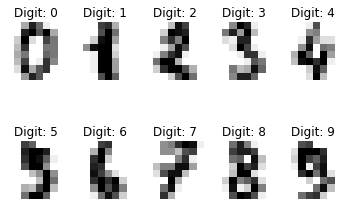

In [14]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import ensemble
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score

# 손으로 쓴 숫자 데이터 읽기
digits = datasets.load_digits()

# 이미지를 2행 5열로 표시
for label, img in zip(digits.target[:10], digits.images[:10]):
    plt.subplot(2, 5, label + 1)
    plt.axis('off')
    plt.imshow(img, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Digit: {0}'.format(label))
plt.show()

In [15]:
# 3과 8의 데이터 위치를 구하기
flag_3_8 = (digits.target == 3) + (digits.target == 8)

# 3과 8의 데이터를 구하기
images = digits.images[flag_3_8]
labels = digits.target[flag_3_8]

# 3과 8의 이미지 데이터를 1차원화
images = images.reshape(images.shape[0], -1)

# 분류기 생성
train_size = int(images.shape[0] * 0.6)  # 214
# n_estimators=20: 분류기 갯수
classifier = ensemble.RandomForestClassifier(n_estimators=20, max_depth=3, criterion="gini")
classifier.fit(images[:train_size], labels[:train_size]) # labels: class

# 분류기 성능을 확인
expected = labels[train_size:]
predicted = classifier.predict(images[train_size:]) # 40% 테스트 데이터

print('Accuracy:\n', accuracy_score(expected, predicted))

'''
              예측
              3   8
         ┌--------- 
실제 3 │ 63  12
       8 │  1  67
     
'''
print('Confusion matrix:\n', confusion_matrix(expected, predicted))
print('Precision:\n', precision_score(expected, predicted, pos_label=3))
print('Recall:\n', recall_score(expected, predicted, pos_label=3))
print('F-measure:\n', f1_score(expected, predicted, pos_label=3))


Accuracy:
 0.9090909090909091
Confusion matrix:
 [[63 12]
 [ 1 67]]
Precision:
 0.984375
Recall:
 0.84
F-measure:
 0.9064748201438849


## 3. 앙상블학습:부스팅, AdaBoost를 사용한 경우(가중치 이용)

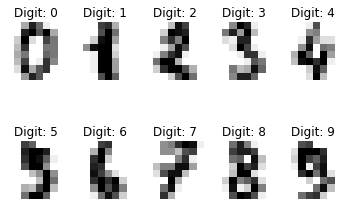

In [16]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import tree, ensemble
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score

# 손으로 쓴 숫자 데이터 읽기
digits = datasets.load_digits()

# 이미지를 2행 5열로 표시
for label, img in zip(digits.target[:10], digits.images[:10]):
    plt.subplot(2, 5, label + 1)
    plt.axis('off')
    plt.imshow(img, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Digit: {0}'.format(label))
plt.show()

In [17]:
# 3과 8의 데이터 위치를 구하기
flag_3_8 = (digits.target == 3) + (digits.target == 8)

# 3과 8의 데이터를 구하기
images = digits.images[flag_3_8]
labels = digits.target[flag_3_8]

# 3과 8의 이미지 데이터를 1차원화
images = images.reshape(images.shape[0], -1)

# 분류기 생성
train_size = int(images.shape[0] * 0.6)  # 214
classifier = ensemble.AdaBoostClassifier(base_estimator=tree.DecisionTreeClassifier(max_depth=3), n_estimators=20)
classifier.fit(images[:train_size], labels[:train_size])

# 분류기 성능을 확인
expected = labels[train_size:]
predicted = classifier.predict(images[train_size:])

print('Accuracy:\n', accuracy_score(expected, predicted))

'''
             예측
              3   8
         ┌--------- 
실제 3 │ 64  11
       8 │  0  68
     
'''
print('Confusion matrix:\n', confusion_matrix(expected, predicted))
print('Precision:\n', precision_score(expected, predicted, pos_label=3))
print('Recall:\n', recall_score(expected, predicted, pos_label=3))
print('F-measure:\n', f1_score(expected, predicted, pos_label=3))


Accuracy:
 0.9230769230769231
Confusion matrix:
 [[64 11]
 [ 0 68]]
Precision:
 1.0
Recall:
 0.8533333333333334
F-measure:
 0.9208633093525179


## 4.SupportVectorMachine

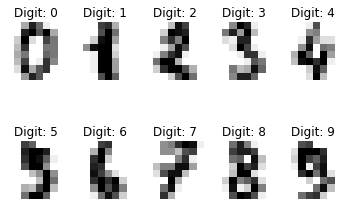

In [18]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import svm
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score

# 손으로 쓴 숫자 데이터 읽기
digits = datasets.load_digits()

# 이미지를 2행 5열로 표시
for label, img in zip(digits.target[:10], digits.images[:10]):
    plt.subplot(2, 5, label + 1)
    plt.axis('off')
    plt.imshow(img, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Digit: {0}'.format(label))
plt.show()

In [19]:
# 3과 8의 데이터를 구하기
flag_3_8 = (digits.target == 3) + (digits.target == 8)

# 3과 8의 데이터를 구하기
images = digits.images[flag_3_8]
labels = digits.target[flag_3_8]

# 3과 8의 이미지 데이터를 1차원화
images = images.reshape(images.shape[0], -1)

# 분류기 생성
train_size = int(images.shape[0] * 0.6)  # 214
classifier = svm.SVC(C = 1.0, gamma = 0.001)
classifier.fit(images[:train_size], labels[:train_size])

# 분류기 성능을 확인
expected = labels[train_size:]
predicted = classifier.predict(images[train_size:])

print('Accuracy:\n', accuracy_score(expected, predicted))

'''
              예측
              3   8
         ┌--------- 
실제 3 │ 66  9
       8 │  0  68
     
'''
print('Confusion matrix:\n', confusion_matrix(expected, predicted))
print('Precision:\n', precision_score(expected, predicted, pos_label=3))
print('Recall:\n', recall_score(expected, predicted, pos_label=3))
print('F-measure:\n', f1_score(expected, predicted, pos_label=3))


Accuracy:
 0.9370629370629371
Confusion matrix:
 [[66  9]
 [ 0 68]]
Precision:
 1.0
Recall:
 0.88
F-measure:
 0.9361702127659575
